# **Proyek 1: Natural Language Processing**
Belajar Pengembangan Machine Learning - Learning Path Dicoding
Project 1

## Raihan Sultan P B

## Import Libs and Dataset

In [ ]:
import zipfile
import os
file_zip = "/Users/toughrebel/Downloads/archive (2).zip"
ref_zip = zipfile.ZipFile(file_zip, 'r')
ref_zip.extractall("/Users/toughrebel/Downloads/data_gplay")
ref_zip.close()

## Exploratory Data Analysis (EDR)

In [49]:
# make dataframe
!pip install pandas
import pandas as pd

df = pd.read_csv('/Users/toughrebel/Downloads/data_gplay/googleplaystore.csv')
df = df.drop(columns=['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Last Updated', 'Current Ver', 'Android Ver'])
df.head()

,Category,Content Rating,Genres
0,ART_AND_DESIGN,Everyone,Art & Design
1,ART_AND_DESIGN,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,Everyone,Art & Design
3,ART_AND_DESIGN,Teen,Art & Design
4,ART_AND_DESIGN,Everyone,Art & Design;Creativity


## Data Preprocessing

In [52]:
# one-hot encoding
Category = pd.get_dummies(df.Category)
new_df = pd.concat([df, Category], axis=1)
new_df = new_df.drop(columns='Category')
new_df

,Content Rating,Genres,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,Everyone,Art & Design,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Everyone,Art & Design;Pretend Play,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Everyone,Art & Design,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Teen,Art & Design,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Everyone,Art & Design;Creativity,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Everyone,Education,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10837,Everyone,Education,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10838,Everyone,Medical,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10839,Mature 17+,Books & Reference,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# import libs
!pip install nltk
!pip install scikit-learn
import nltk, re, string
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\toughrebel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\toughrebel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\toughrebel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\toughrebel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [56]:
!pip install scikit-learn

# make all characters lowercase
new_df['Genres'] = new_df['Genres'].str.lower()

# removing stopwords
stop_words = stopwords.words('english')
new_df['Genres'] = new_df['Genres'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# non-alphumeric character handling
new_df["Genres"] = new_df['Genres'].str.replace('[^\w\s]','')

new_df

,Content Rating,Genres,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,Everyone,art & design,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Everyone,art & design;pretend play,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Everyone,art & design,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Teen,art & design,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Everyone,art & design;creativity,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Everyone,education,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10837,Everyone,education,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10838,Everyone,medical,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10839,Mature 17+,books & reference,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

Genres = new_df['Genres'].values
Category = new_df[['ART_AND_DESIGN',	'AUTO_AND_VEHICLES',	'BEAUTY',	'BOOKS_AND_REFERENCE',	'BUSINESS',	'COMICS',	'COMMUNICATION',	'PERSONALIZATION',	'PHOTOGRAPHY',	'PRODUCTIVITY',	'SHOPPING',	'SOCIAL',	'SPORTS',	'TOOLS',	'TRAVEL_AND_LOCAL',	'VIDEO_PLAYERS',	'WEATHER']].values
Genres_train, Genres_test, Category_train, Category_test = train_test_split(Genres, Category, test_size=0.2, shuffle=True)

In [ ]:
# tokenizing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
     
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(Genres_train)

train_sequence = tokenizer.texts_to_sequences(Genres_train)
test_sequence = tokenizer.texts_to_sequences(Genres_test)

train_padded = pad_sequences(train_sequence, maxlen=50, padding='post', truncating='post') 
test_padded = pad_sequences(test_sequence, maxlen=50, padding='post', truncating='post')

# Modeling

In [68]:
# model building
import tensorflow as tf
from keras.layers import LSTM

model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=10000, output_dim=32),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(17, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# callback when both accuration > 90%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
        print("\nBoth accuracies are at over 90%!")
        self.model.stop_training = True
callbacks = myCallback()

In [73]:
# model fitting
num_epochs = 100

history = model.fit(train_padded, Category_train, epochs=num_epochs, shuffle=True,
                    validation_data=(test_padded, Category_test), verbose=2, callbacks=[callbacks])

Epoch 1/100
271/271 - 6s - 24ms/step - accuracy: 0.0473 - loss: 42.3243 - val_accuracy: 0.0802 - val_loss: 32.1279
Epoch 2/100
271/271 - 6s - 23ms/step - accuracy: 0.0468 - loss: 45.6788 - val_accuracy: 0.0406 - val_loss: 27.7753
Epoch 3/100
271/271 - 7s - 25ms/step - accuracy: 0.0482 - loss: 47.7373 - val_accuracy: 0.0802 - val_loss: 47.8490
Epoch 4/100
271/271 - 14s - 53ms/step - accuracy: 0.0491 - loss: 45.4427 - val_accuracy: 0.0802 - val_loss: 21.6540
Epoch 5/100
271/271 - 13s - 47ms/step - accuracy: 0.0477 - loss: 45.9317 - val_accuracy: 0.0802 - val_loss: 45.0432
Epoch 6/100
271/271 - 12s - 44ms/step - accuracy: 0.0480 - loss: 46.4125 - val_accuracy: 0.0420 - val_loss: 39.4521
Epoch 7/100
271/271 - 10s - 37ms/step - accuracy: 0.0492 - loss: 51.3559 - val_accuracy: 0.0346 - val_loss: 27.0039
Epoch 8/100
271/271 - 10s - 36ms/step - accuracy: 0.0485 - loss: 48.3356 - val_accuracy: 0.0212 - val_loss: 30.2245
Epoch 9/100
271/271 - 12s - 46ms/step - accuracy: 0.0480 - loss: 47.8127 - 

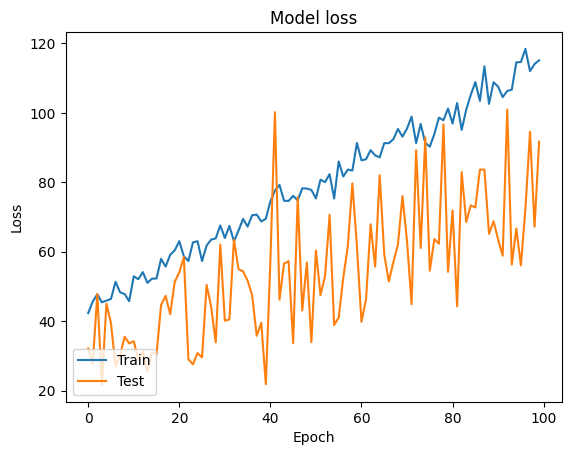

In [ ]:
# model's loss plot
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.show()

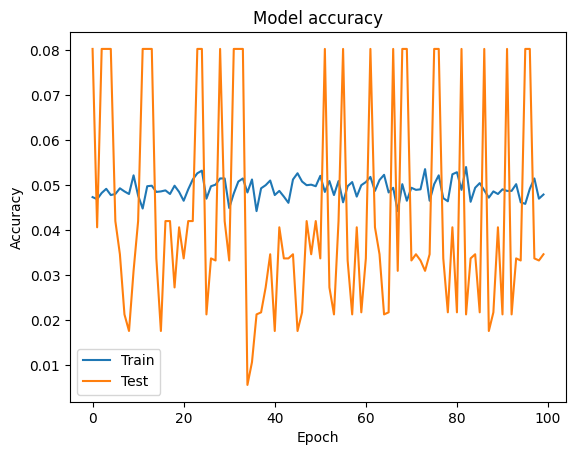

In [ ]:
# model accuracy plot 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.show()